<a href="https://colab.research.google.com/github/anujpatel96/Algorithms/blob/main/TorontoWeatherForecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("weather data toronto.csv")
data.head(10)

,date,max_dew_point_v,max_dew_point_c,max_dew_point_d,max_dew_point_y,max_humidex_v,max_humidex_c,max_humidex_d,max_humidex_y,max_min_temperature_v,max_min_temperature_c,max_min_temperature_d,max_min_temperature_y,max_relative_humidity_v,max_relative_humidity_c,max_relative_humidity_d,max_relative_humidity_y,max_solar_radiation_v,max_solar_radiation_c,max_solar_radiation_d,max_solar_radiation_y,max_temperature_v,max_temperature_c,max_temperature_d,max_temperature_y,max_wind_gust_v,max_wind_gust_c,max_wind_gust_d,max_wind_gust_y,max_wind_speed_v,max_wind_speed_c,max_wind_speed_d,max_wind_speed_y,min_dew_point_v,min_dew_point_c,min_dew_point_d,min_dew_point_y,min_max_temperature_v,min_max_temperature_c,min_max_temperature_d,min_max_temperature_y,min_relative_humidity_v,min_relative_humidity_c,min_relative_humidity_d,min_relative_humidity_y,min_solar_radiation_v,min_solar_radiation_c,min_solar_radiation_d,min_solar_radiation_y,min_temperature_v,min_temperature_c,min_temperature_d,min_temperature_y,min_wind_speed_v,min_wind_speed_c,min_wind_speed_d,min_wind_speed_y,min_windchill_v,min_windchill_c,min_windchill_d,min_windchill_y,precipitation_v,precipitation_c,precipitation_d,precipitation_y,rain_v,rain_c,rain_d,rain_y,snow_v,snow_c,snow_d,snow_y,snow_on_ground_v,snow_on_ground_c,snow_on_ground_d,snow_on_ground_y
0,4/7/2021,14.0,68,1953-04-07 2020-04-07,1991,30.0,1.0,1991-04-07 1991-04-07,1991,15.6,83,1938-04-07 2020-04-07,1991,100,68,1953-04-07 2020-04-07,1954 1956 1958 1964 1965 1966 1978 1983 2010,NaN,NaN,NaN,NaN,27.6,83,1938-04-07 2020-04-07,1991,87,57,1955-04-07 2020-04-07,1956,57,68,1953-04-07 2020-04-07,2017,-20.0,68,1953-04-07 2020-04-07,1972,-5.0,83,1938-04-07 2020-04-07,1972,18,68,1953-04-07 2020-04-07,2012,NaN,NaN,NaN,NaN,-17.2,83,1938-04-07 2020-04-07,1972,0,68,1953-04-07 2020-04-07,1959 1960 1962 1964 1965 1968 1980 1981 1983 1...,-25.0,41.0,1955-04-07 2018-04-07,1972,15.2,83,1938-04-07 2020-04-07,1956,14.4,83,1938-04-07 2020-04-07,2010,14.0,83,1938-04-07 2020-04-07,1967,12,61,1955-04-07 2017-04-07,1994
1,4/6/2021,13.3,69,1953-04-06 2021-04-06,1954 1991,NaN,NaN,NaN,NaN,10.3,84,1938-04-06 2021-04-06,1991,100,69,1953-04-06 2021-04-06,1954 1955 1964 1986,NaN,NaN,NaN,NaN,22.5,84,1938-04-06 2021-04-06,1997,111,54,1955-04-06 2020-04-06,1979,81,69,1953-04-06 2021-04-06,1979,-15.6,69,1953-04-06 2021-04-06,1972,-4.0,84,1938-04-06 2021-04-06,1982,20,69,1953-04-06 2021-04-06,2021,NaN,NaN,NaN,NaN,-11.7,84,1938-04-06 2021-04-06,1972,0,69,1953-04-06 2021-04-06,1953 1954 1956 1962 1964 1965 1966 1968 1978 1...,-20.0,37.0,1953-04-06 2020-04-06,1972,28.2,84,1938-04-06 2021-04-06,2017,27.8,84,1938-04-06 2021-04-06,2017,10.4,84,1938-04-06 2021-04-06,1994,13,62,1955-04-06 2018-04-06,1975
2,4/5/2021,10.9,69,1953-04-05 2021-04-05,1991,NaN,NaN,NaN,NaN,9.9,84,1938-04-05 2021-04-05,2010,100,69,1953-04-05 2021-04-05,1957 1984 1985,NaN,NaN,NaN,NaN,23.1,84,1938-04-05 2021-04-05,2010,96,54,1956-04-05 2020-04-05,1977,58,69,1953-04-05 2021-04-05,1975,-17.8,69,1953-04-05 2021-04-05,2016,-2.1,84,1938-04-05 2021-04-05,2007,24,69,1953-04-05 2021-04-05,2001,NaN,NaN,NaN,NaN,-9.4,84,1938-04-05 2021-04-05,1975 1982,0,69,1953-04-05 2021-04-05,1955 1959 1961 1962 1965 1970 1971 1984 1985 1...,-20.0,43.0,1954-04-05 2019-04-05,1975,22.1,84,1938-04-05 2021-04-05,1941,22.1,84,1938-04-05 2021-04-05,1941,2.0,84,1938-04-05 2021-04-05,2003,13,62,1955-04-05 2018-04-05,1975
3,4/4/2021,13.9,69,1953-04-04 2021-04-04,1974,NaN,NaN,NaN,NaN,12.0,84,1938-04-04 2021-04-04,1981,100,69,1953-04-04 2021-04-04,1956 1960 1968 1974 1979 1983 1989 2007,NaN,NaN,NaN,NaN,23.1,84,1938-04-04 2021-04-04,1981,103,59,1956-04-04 2020-04-04,1963,77,69,1953-04-04 2021-04-04,1963,-19.4,69,1953-04-04 2021-04-04,1954,-4.4,84,1938-04-04 2021-04-04,1975,21,69,1953-04-04 2021-04-04,1958,NaN,NaN,NaN,NaN,-11.7,84,1938-04-04 2021-04-04,1954,0,69,1953-04-04 2021-04-04,1959 1960 1961 1962 1972 1973 1977 1978 1980 1...,-19.0,38.0,1954-04-04 2021-04-04,1975,18.0,84,1938-04-04 2021-04-04,1968,18.0,84,1938-04-

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 77 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1000 non-null   object 
 1   max_dew_point_v          1000 non-null   float64
 2   max_dew_point_c          1000 non-null   int64  
 3   max_dew_point_d          1000 non-null   object 
 4   max_dew_point_y          1000 non-null   object 
 5   max_humidex_v            550 non-null    float64
 6   max_humidex_c            550 non-null    float64
 7   max_humidex_d            550 non-null    object 
 8   max_humidex_y            550 non-null    object 
 9   max_min_temperature_v    1000 non-null   float64
 10  max_min_temperature_c    1000 non-null   int64  
 11  max_min_temperature_d    1000 non-null   object 
 12  max_min_temperature_y    1000 non-null   object 
 13  max_relative_humidity_v  1000 non-null   int64  
 14  max_relative_humidity_c  

In [4]:
data = data[["date", "max_dew_point_v", "min_dew_point_v", "max_wind_speed_v", "min_wind_speed_v", "max_min_temperature_v", "max_temperature_v", "min_max_temperature_v", "min_temperature_v", "snow_v", "rain_v"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1000 non-null   object 
 1   max_dew_point_v        1000 non-null   float64
 2   min_dew_point_v        1000 non-null   float64
 3   max_wind_speed_v       1000 non-null   int64  
 4   min_wind_speed_v       1000 non-null   int64  
 5   max_min_temperature_v  1000 non-null   float64
 6   max_temperature_v      1000 non-null   float64
 7   min_max_temperature_v  1000 non-null   float64
 8   min_temperature_v      1000 non-null   float64
 9   snow_v                 1000 non-null   float64
 10  rain_v                 1000 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 86.1+ KB


In [5]:
data.isna().sum()

date                     0
max_dew_point_v          0
min_dew_point_v          0
max_wind_speed_v         0
min_wind_speed_v         0
max_min_temperature_v    0
max_temperature_v        0
min_max_temperature_v    0
min_temperature_v        0
snow_v                   0
rain_v                   0
dtype: int64

In [6]:
import statistics
data["Temp"] = "Nan"
data["dew"] = "Nan"
data["wind_speed"] = "Nan"
data["snow"] = data["snow_v"]
data["rain"] = data["rain_v"]

for i in range(len(data)):
  data["Temp"][i] = statistics.mean([data["max_min_temperature_v"][i], data["max_temperature_v"][i], data["min_max_temperature_v"][i], data["min_temperature_v"][i]])
  data["dew"][i] = statistics.mean([data["max_dew_point_v"][i], data["min_dew_point_v"][i]])
  data["wind_speed"][i] = statistics.mean([data["max_wind_speed_v"][i], data["min_wind_speed_v"][i]])

data = data[["date", "Temp", "dew", "wind_speed", "snow", "rain"]]
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by Inte

,date,Temp,dew,wind_speed,snow,rain
0,4/7/2021,5.25,-3,28,14.0,14.4
1,4/6/2021,4.275,-1.15,40,10.4,27.8
2,4/5/2021,5.375,-3.45,29,2.0,22.1
3,4/4/2021,4.75,-2.75,38,7.5,18.0
4,4/3/2021,3.475,-3.35,30,17.5,40.2
...,...,...,...,...,...,...
995,7/17/2018,22.025,13.5,30,0.0,31.8
996,7/16/2018,21.7,14.75,18,0.0,25.9
997,7/15/2018,20.475,15.05,29,0.0,40.5
998,7/14/2018,21.075,13.25,24,0.0,32.5


In [7]:
data["date"]= pd.to_datetime(data["date"])
data

,date,Temp,dew,wind_speed,snow,rain
0,2021-04-07,5.25,-3,28,14.0,14.4
1,2021-04-06,4.275,-1.15,40,10.4,27.8
2,2021-04-05,5.375,-3.45,29,2.0,22.1
3,2021-04-04,4.75,-2.75,38,7.5,18.0
4,2021-04-03,3.475,-3.35,30,17.5,40.2
...,...,...,...,...,...,...
995,2018-07-17,22.025,13.5,30,0.0,31.8
996,2018-07-16,21.7,14.75,18,0.0,25.9
997,2018-07-15,20.475,15.05,29,0.0,40.5
998,2018-07-14,21.075,13.25,24,0.0,32.5


In [8]:
def get_year(x):
  return x[0:4]
def get_month(x):
  return x[5:7]

In [9]:
df = pd.DataFrame()
df['year'] = data['date'].apply(lambda x: get_year(str(x)))
df['month'] = data['date'].apply(lambda x: get_month(str(x)))
df['Temp'] = data['Temp']
df

,year,month,Temp
0,2021,04,5.25
1,2021,04,4.275
2,2021,04,5.375
3,2021,04,4.75
4,2021,04,3.475
...,...,...,...
995,2018,07,22.025
996,2018,07,21.7
997,2018,07,20.475
998,2018,07,21.075


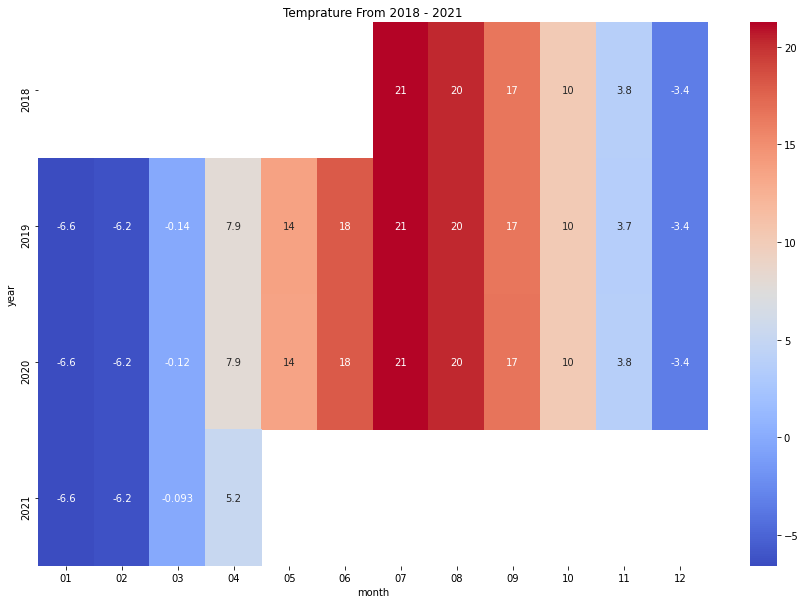

In [10]:
temp_year = pd.crosstab(df['year'], df['month'], values=df['Temp'].apply(pd.to_numeric), aggfunc='mean')
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Temprature From 2018 - 2021")
plt.show()

In [11]:
data.index.dtype

dtype('int64')

In [12]:
data = data.set_index('date')
data

,Temp,dew,wind_speed,snow,rain
date,,,,,
2021-04-07,5.25,-3,28,14.0,14.4
2021-04-06,4.275,-1.15,40,10.4,27.8
2021-04-05,5.375,-3.45,29,2.0,22.1
2021-04-04,4.75,-2.75,38,7.5,18.0
2021-04-03,3.475,-3.35,30,17.5,40.2
...,...,...,...,...,...
2018-07-17,22.025,13.5,30,0.0,31.8
2018-07-16,21.7,14.75,18,0.0,25.9
2018-07-15,20.475,15.05,29,0.0,40.5


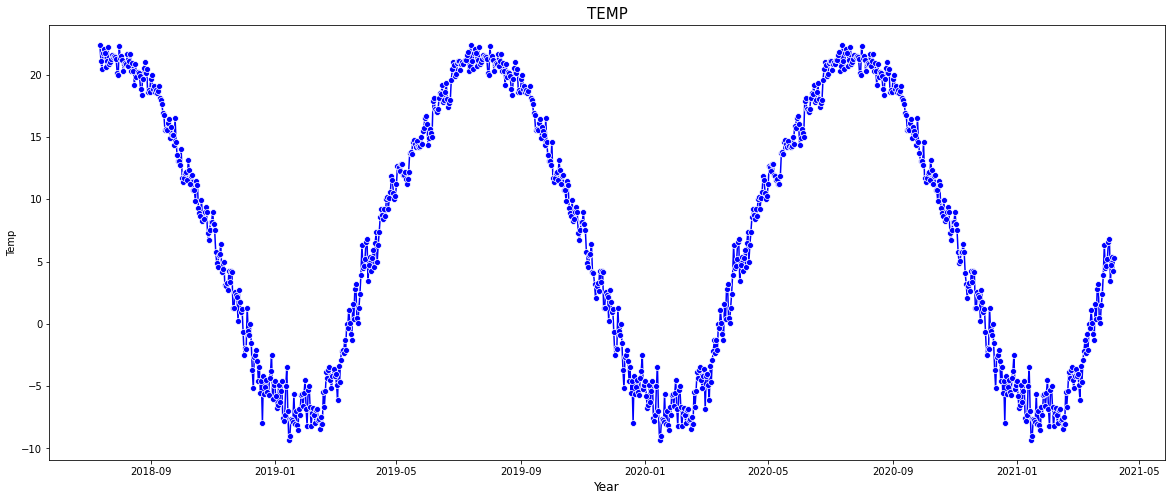

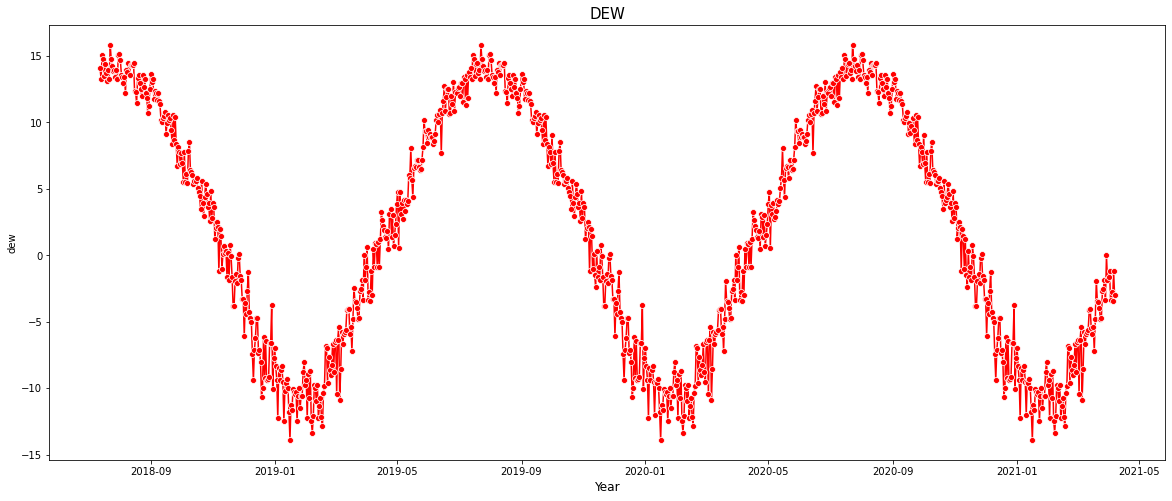

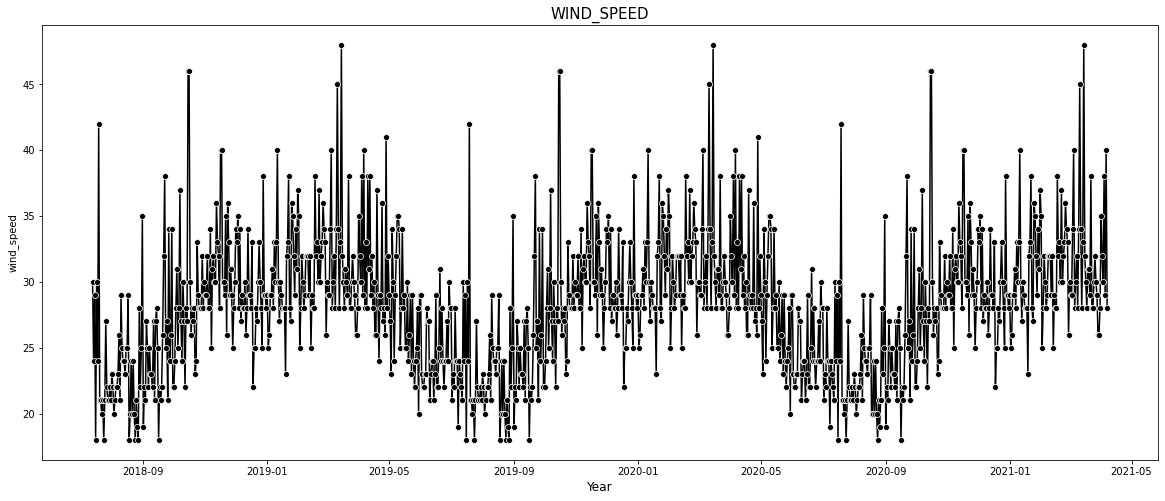

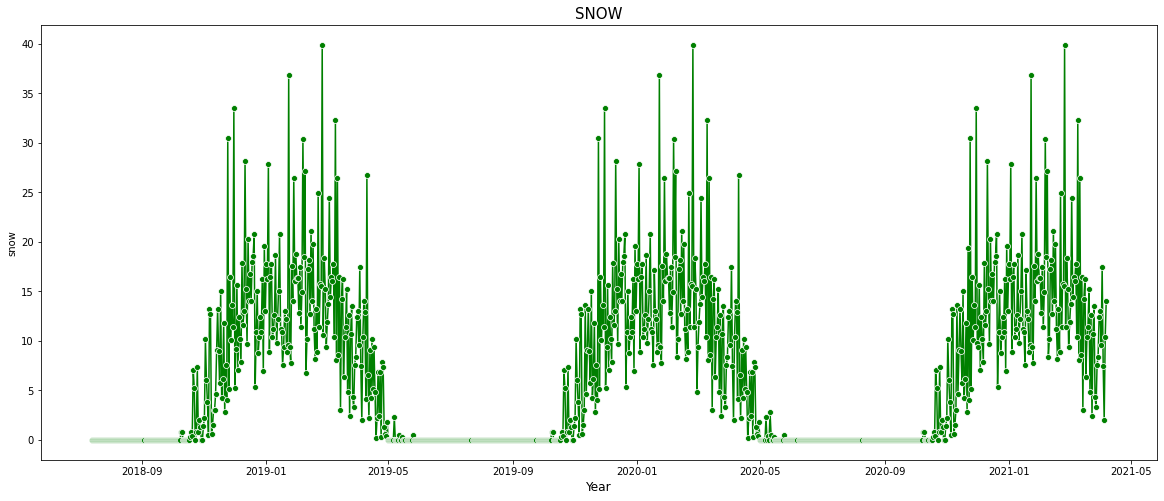

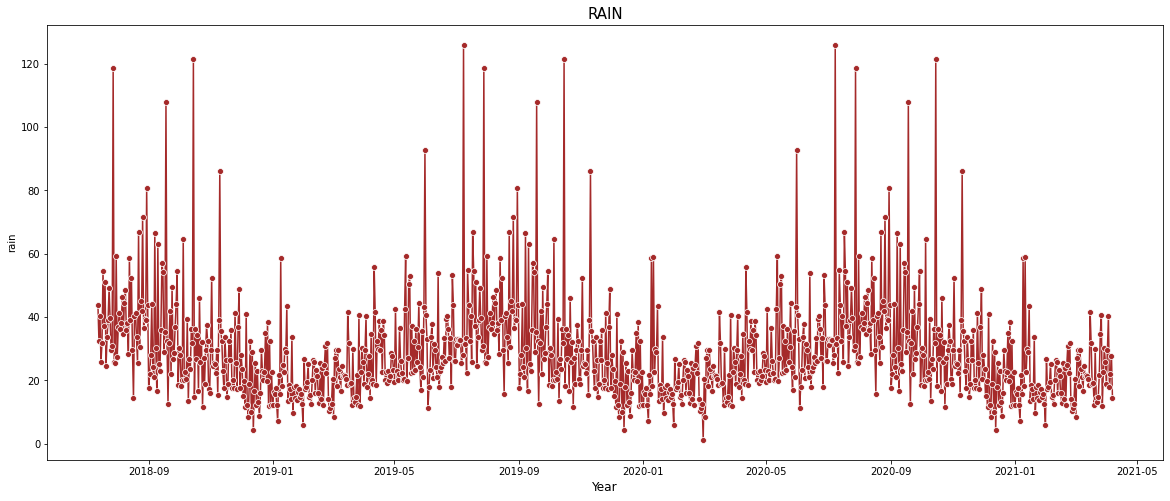

In [13]:
import seaborn as sns
color={0:'blue',
       1:'red',
       2:'black',
       3:'green',
       4:'brown',
       5:'orange'}
for index in range(5):
    plt.figure(figsize=(20,8))
    plt.xlabel('Year', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index].apply(pd.to_numeric), 
                 color=color[index], marker='o')
    plt.show()
    print()
    print()
  

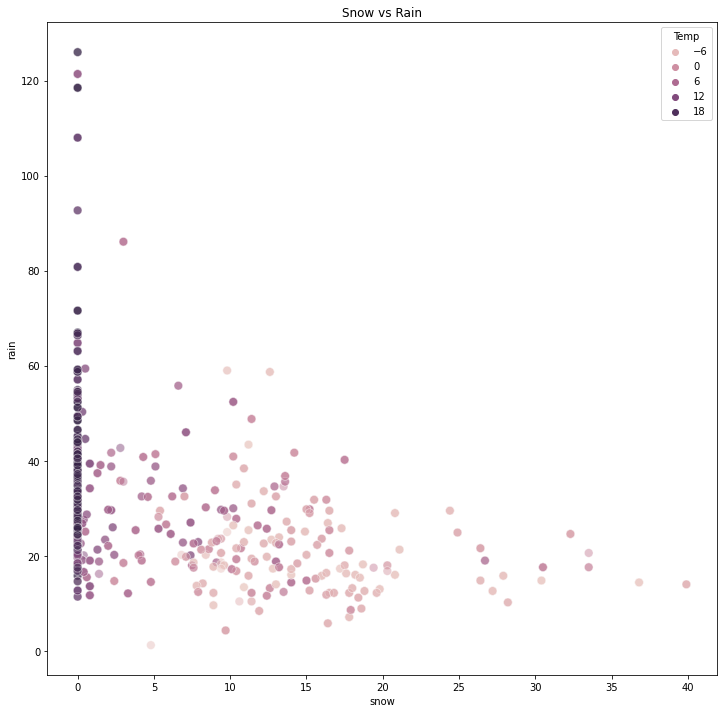

In [14]:
plt.figure(figsize=(12,12))
plt.title('Snow vs Rain')
sns.scatterplot(x=data.iloc[:,3],
                y=data.iloc[:,4],
                hue=data.iloc[:,0],
                s=75,
                alpha=0.5)
plt.show()

In [15]:
data_temp = data[["Temp"]]
data_temp

,Temp
date,
2021-04-07,5.25
2021-04-06,4.275
2021-04-05,5.375
2021-04-04,4.75
2021-04-03,3.475
...,...
2018-07-17,22.025
2018-07-16,21.7
2018-07-15,20.475


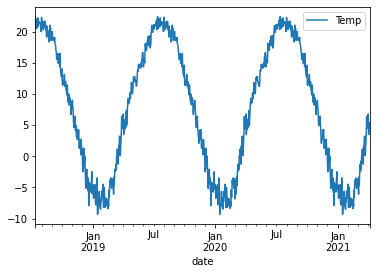

In [16]:
data_temp.plot(y = ["Temp"], kind = 'line')


Text(0, 0.5, 'Temp')

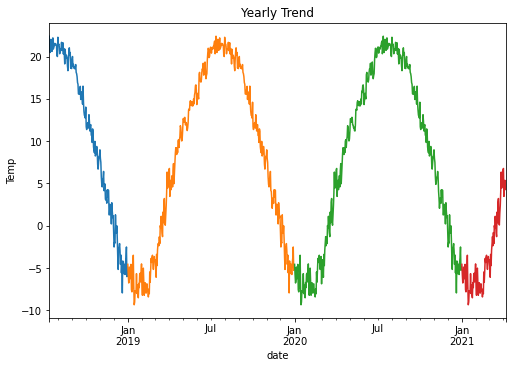

In [17]:
plt.figure(figsize = (18,25))  
ax1 = plt.subplot(4,2,1)
data_temp["Temp"].groupby(data_temp.index.year).plot(ax=ax1,title='Yearly Trend')
ax1.set_ylabel("Temp")


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43a59f6290>],
      dtype=object)

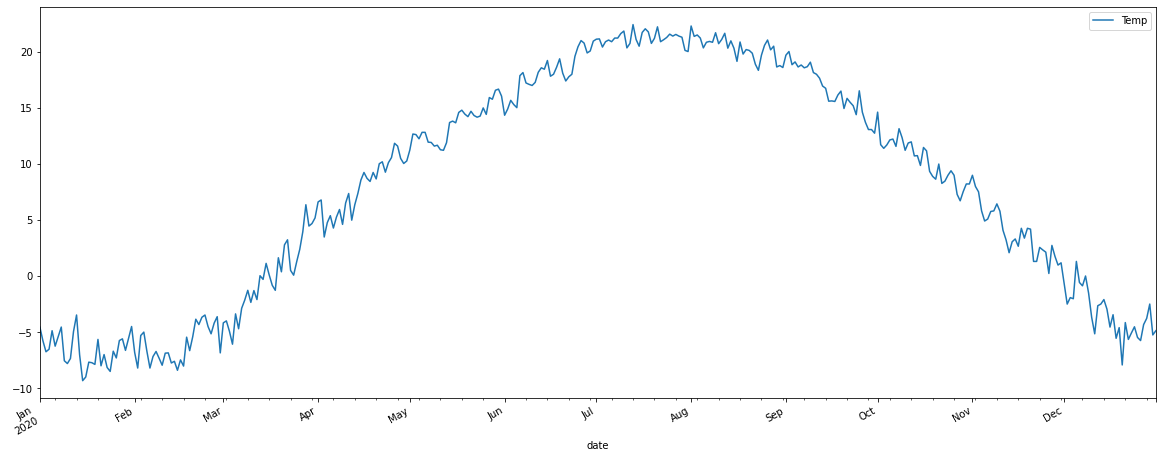

In [18]:
data_temp["2020"].plot(subplots=True, figsize=(20,8))

In [19]:
train = data_temp["2020": "2018"]
test =  data_temp["2021"]
len(test)


97

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


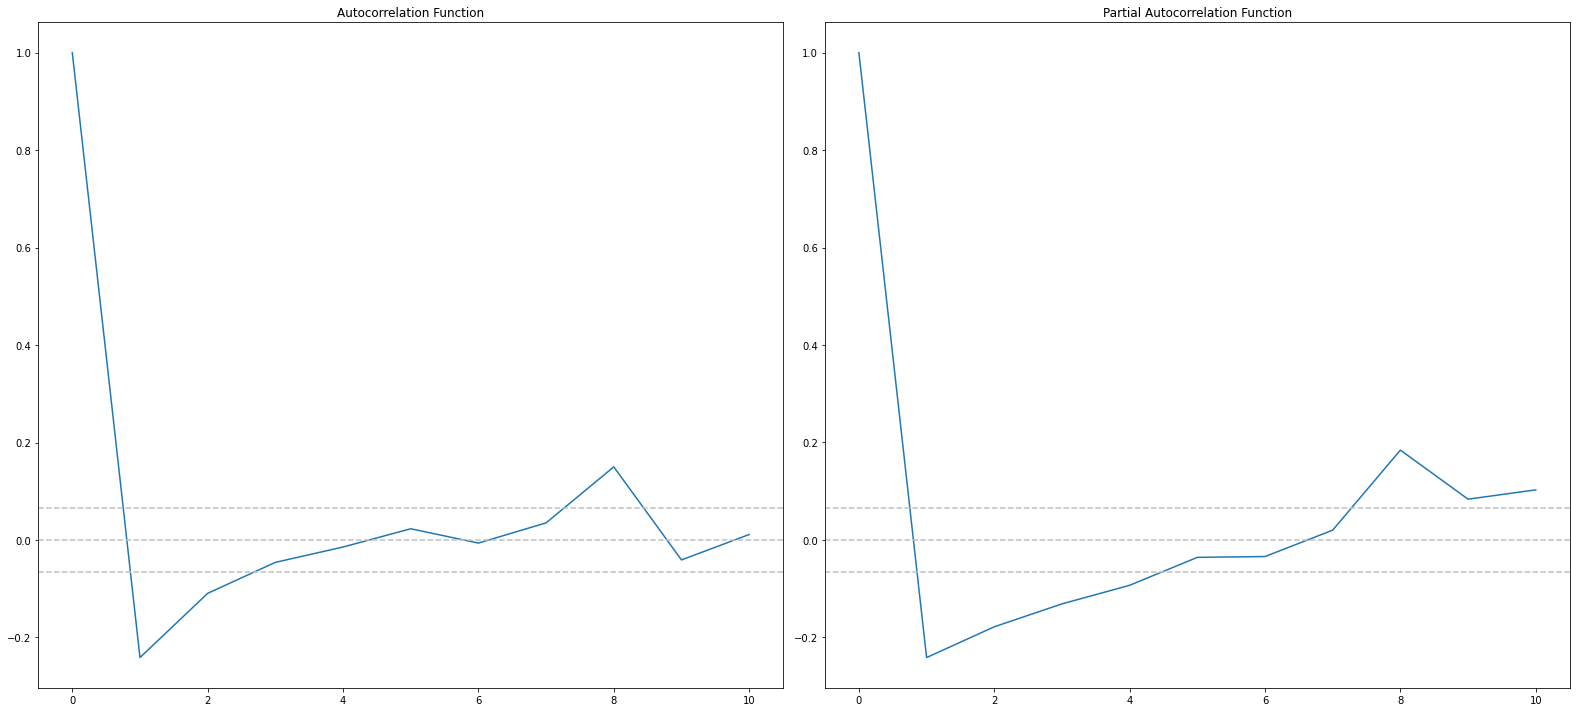

In [20]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_lag = acf(train.diff().dropna().values, nlags=10)
pacf_lag = pacf(train.diff().dropna().values, nlags=10, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  902
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1359.899
Method:                       css-mle   S.D. of innovations              1.093
Date:                Sun, 11 Apr 2021   AIC                           2727.798
Time:                        23:09:35   BIC                           2747.016
Sample:                             1   HQIC                          2735.139
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0294      0.020      1.476      0.140      -0.010       0.068
ar.L1.D.y      0.2710      0.060      4.529      0.000       0.154       0.388
ma.L1.D.y     -0.6015      0.046    -13.180      0.0

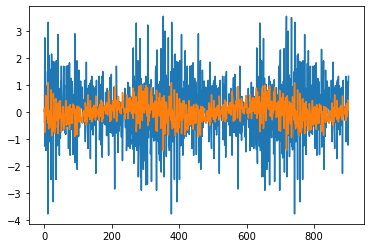

In [22]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.values, order=(1,1,1))
model_fit = model.fit(disp=0)
plt.plot(train.diff().values)
plt.plot(model_fit.fittedvalues)
print(model_fit.summary())



In [23]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

0    0.0293975
1     0.137397
2    -0.747024
3   -0.0107032
4     0.195231
dtype: object

In [24]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

0    0.0293975
1     0.166794
2     -0.58023
3    -0.590933
4    -0.395702
dtype: object

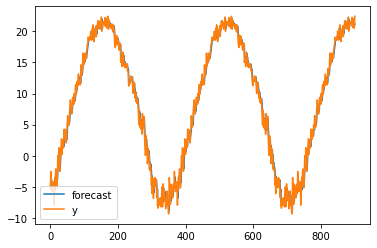

In [25]:
model_fit.plot_predict(dynamic=False)
plt.show()

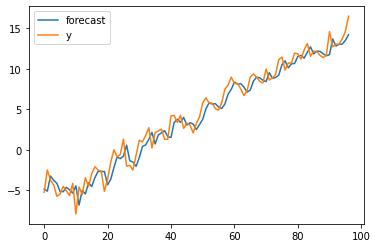

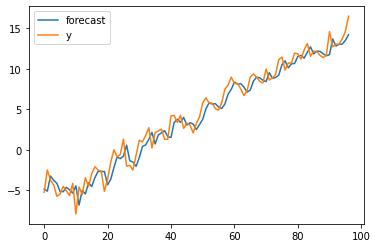

In [26]:
model_fit.plot_predict(1,97)